<a href="https://colab.research.google.com/github/Shubham04689/colab_notebooks/blob/main/SVM_Linear_Classifier_Penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Learning Objective

At the end of the experiment, you will be able to :

* Perform SVM linear classifier

In [1]:
import pandas as pd

# Download the dataset from the provided link
!wget https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Penguin.csv
# Load the dataset into a pandas DataFrame
iris_df = pd.read_csv('Penguin.csv')

# Print the first few rows of the DataFrame to check if the data loaded correctly
print(iris_df.head())

--2024-10-17 17:05:56--  https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Penguin.csv
Resolving cdn.iiith.talentsprint.com (cdn.iiith.talentsprint.com)... 172.105.52.210
Connecting to cdn.iiith.talentsprint.com (cdn.iiith.talentsprint.com)|172.105.52.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13520 (13K) [application/octet-stream]
Saving to: ‘Penguin.csv’

Penguin.csv         100%[===================>]  13.20K  --.-KB/s    in 0s      

2024-10-17 17:05:58 (315 MB/s) - ‘Penguin.csv’ saved [13520/13520]

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             1

### Import required packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

### Load the data

In [3]:
data = pd.read_csv("/content/Penguin.csv")
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
# Drop the NaN values from the data
data.dropna(inplace=True)
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [5]:
data.isna().sum()

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


###From the given data, we will select the 'culmen_depth_mm' and 'flipper_length_mm' features for the Gento and Chinstrap species as they are linearly separable

In [6]:
# Created a small dataset for SVM classification, consisting of culmen_depth_mm and flipper_length_mm from Gento and Chinstrap

df = data[(data['species']!='Adelie')]
df = df[['culmen_depth_mm','flipper_length_mm', 'species']]
df.head()

# Above we have selected only Gento and Chinstrap and not Adelie (!='Adelie')

,culmen_depth_mm,flipper_length_mm,species
152,17.9,192.0,Chinstrap
153,19.5,196.0,Chinstrap
154,19.2,193.0,Chinstrap
155,18.7,188.0,Chinstrap
156,19.8,197.0,Chinstrap


### Convert categorical values to numerical targets and plot the graph for Gento and Chinstrap species

     culmen_depth_mm  flipper_length_mm
152             17.9              192.0
153             19.5              196.0
154             19.2              193.0
155             18.7              188.0
156             19.8              197.0
..               ...                ...
338             13.7              214.0
340             14.3              215.0
341             15.7              222.0
342             14.8              212.0
343             16.1              213.0

[187 rows x 2 columns]


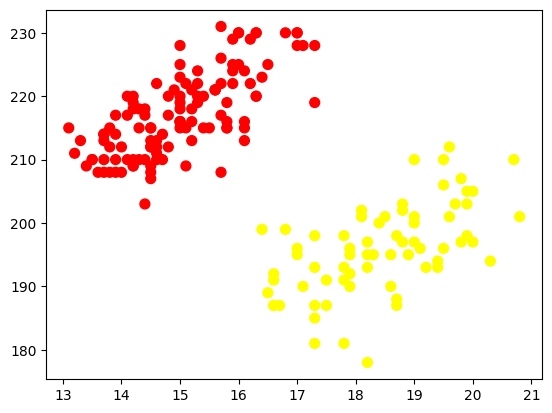

In [7]:
# Convert categorical values to numerical targets
df = df.replace('Gentoo', 0)
df = df.replace('Chinstrap', 1)

# Assign data to 'X' and labels to 'y'
X1 = df.iloc[:, :2]
print(X1)
y1 = df['species']

# View the scatter plot
plt.scatter(X1.iloc[:, 0], X1.iloc[:, 1], c=y1, s=50, cmap='autumn')
plt.show()

### Splitting the data into train and test sets

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3)

In [9]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(130, 2) (130,)
(57, 2) (57,)


### Train a SVM Linear Classifier

In [10]:
from sklearn.svm import SVC
model = SVC(kernel='linear')

In [11]:
# Fit the model using training data
from sklearn.metrics import accuracy_score
model.fit(X_train, y_train)

# Predict the model
predict = model.predict(X_test)

# Calculate the accuracy
accuracy_score(y_test, predict)

1.0

### View the coordinates of the support vectors and Visualize them

In [12]:
model.support_vectors_

array([[ 17.3, 219. ],
       [ 14.4, 203. ],
       [ 19. , 210. ]])

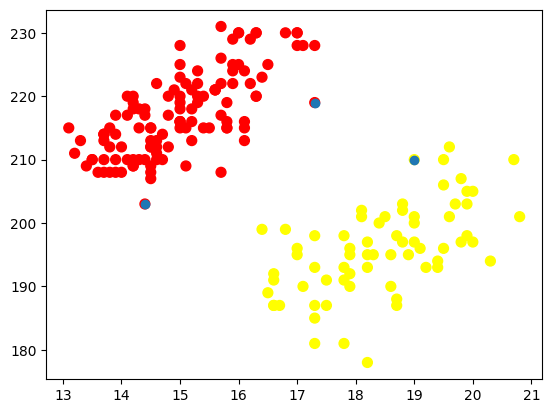

In [13]:
# Visualize the support vectors in the plot
plt.scatter(X1.iloc[:, 0], X1.iloc[:, 1], c=y1, s=50, cmap='autumn')
plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1])

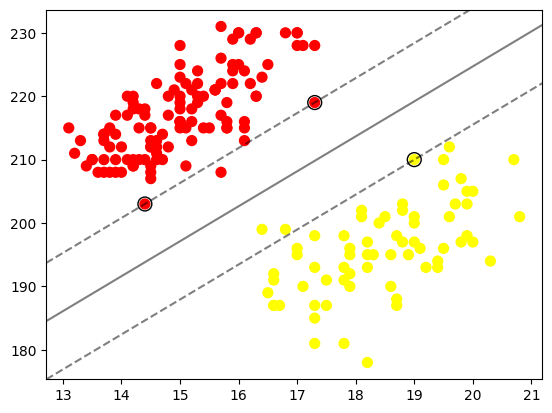

In [15]:

ax = plt.gca()
plt.scatter(X1.iloc[:, 0], X1.iloc[:, 1], c=y1, s=50, cmap='autumn')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

###  From the above dataset we will select the 'culmen_depth_mm' and 'flipper_length_mm' features for the Gento and Adelie species as they are linearly separable

In [16]:
df2 = data[(data['species']!='Chinstrap')]
df2 = df2[['culmen_depth_mm','flipper_length_mm', 'species']]
df2.head()

,culmen_depth_mm,flipper_length_mm,species
0,18.7,181.0,Adelie
1,17.4,186.0,Adelie
2,18.0,195.0,Adelie
4,19.3,193.0,Adelie
5,20.6,190.0,Adelie


###  Convert categorical values to numerical targets and plot the graph for Gento and Adelie species

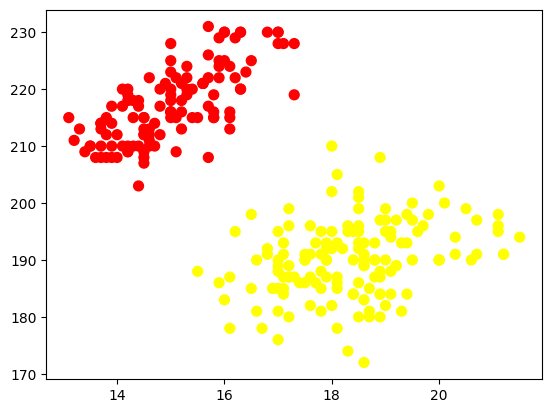

In [17]:
# convert categorical values to numerical targets
df2 = df2.replace('Gentoo', 0)
df2 = df2.replace('Adelie', 1)

# Assign data to 'X' and labels to 'y'
X2 = df2.iloc[:, :2]
y2 = df2['species']

# view the scatter plot
plt.scatter(X2.iloc[:, 0], X2.iloc[:, 1], c=y2, s=50, cmap='autumn')
plt.show()

### Splitting the data into train and test sets

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3)

In [19]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(185, 2) (185,)
(80, 2) (80,)


### Train a SVM Linear Classifier

In [20]:
from sklearn.metrics import accuracy_score
model.fit(X_train, y_train)

predict = model.predict(X_test)

accuracy_score(y_test, predict)

1.0

###  Visualize the support vectors in the plot


In [21]:
model.support_vectors_

array([[ 16.1, 213. ],
       [ 15.1, 209. ],
       [ 18. , 210. ]])

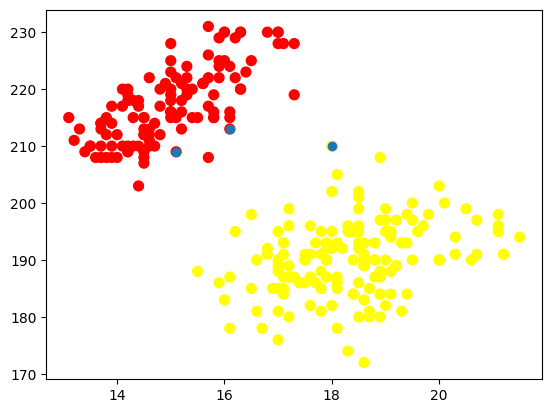

In [22]:
# Visualize the support vectors in the plot
plt.scatter(X2.iloc[:, 0], X2.iloc[:, 1], c=y2, s=50, cmap='autumn')
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1])
plt.show()